# Sales Analysis

## Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Reading CSVs

In [78]:
location = r'D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset/*.csv'
for file in glob.glob(location):
    print(file)

D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_April_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_August_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_December_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_February_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_January_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_July_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_June_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_March_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_May_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_November_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_October_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Anal

In [79]:
df = pd.read_csv(r'D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_January_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Function to combine CSV files

In [80]:
def combinedata(x):
        dfs = []
        for file in glob.glob(x):
            dfs.append(pd.read_csv(file))
            combineddfs = pd.concat(dfs,ignore_index=True)
        return combineddfs

filepath = r'D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset/*'

maindf = combinedata(filepath)
maindf.shape

(186849, 6)

## Final combined dataframe

In [81]:
maindf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Cleaning dataframe

### Removing NULLS

In [82]:
maindf.isna().sum()
nan = maindf[maindf.isna().any(axis=1)]
maindf = maindf.dropna(how='all')
maindf.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Removing Column names from rows

In [83]:
print(maindf[maindf['Order ID'] == "Order ID"].head())
print(maindf[maindf['Order ID'] == "Order ID"].count())
maindf = maindf.drop(maindf[maindf['Order ID'] == 'Order ID'].index)
print(maindf[maindf['Order ID'] == "Order ID"].count())

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
518   Order ID  Product  Quantity Ordered  Price Each  Order Date   
1148  Order ID  Product  Quantity Ordered  Price Each  Order Date   
1154  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2877  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2892  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
518   Purchase Address  
1148  Purchase Address  
1154  Purchase Address  
2877  Purchase Address  
2892  Purchase Address  
Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


## Standardizing dates

In [84]:
maindf['Order Date'] = maindf['Order Date'].str.replace('/', '-')

## Changing Datatypes to increase speed

In [85]:
maindf['Quantity Ordered'] = pd.to_numeric(maindf['Quantity Ordered'])
maindf['Price Each'] = pd.to_numeric(maindf['Price Each'])
maindf['Order ID'] = pd.to_numeric(maindf['Order ID'])
maindf['Order Date'] = pd.to_datetime(maindf['Order Date'])
maindf.info()

C:\Users\Anish\AppData\Local\Temp\ipykernel_14580\4067419981.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


## adding columns

In [86]:
#Rename Order Date to Order Datetime
maindf.rename(columns={'Order Date': 'Order DateTime'}, inplace=True)

#Date
maindf['Date'] = maindf['Order DateTime'].dt.date

# Month column
maindf['Month'] = maindf['Order DateTime'].dt.month

# weekday
maindf['Weekday'] = maindf['Order DateTime'].dt.weekday

# Day column
maindf['MonthDay'] = maindf['Order DateTime'].dt.day

# Hour column
maindf['Hour'] = maindf['Order DateTime'].dt.hour

# Minute column
maindf['Minute'] = maindf['Order DateTime'].dt.minute

In [87]:
# Sales Column
maindf['Sales'] = maindf['Quantity Ordered'] * maindf['Price Each']

In [88]:
# City State column
# City State
def get_city_state(x):
    return f"{x.split(', ')[1]} {x.split(', ')[2].split(' ')[0]}"

maindf['City State'] = maindf['Purchase Address'].apply(lambda x: get_city_state(x))

In [89]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order DateTime    185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Date              185950 non-null  object        
 7   Month             185950 non-null  int32         
 8   Weekday           185950 non-null  int32         
 9   MonthDay          185950 non-null  int32         
 10  Hour              185950 non-null  int32         
 11  Minute            185950 non-null  int32         
 12  Sales             185950 non-null  float64       
 13  City State        185950 non-null  object        
dtypes: dateti

In [90]:
maindf

,Order ID,Product,Quantity Ordered,Price Each,Order DateTime,Purchase Address,Date,Month,Weekday,MonthDay,Hour,Minute,Sales,City State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,4,4,19,8,46,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,4,6,7,22,30,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,12,14,38,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,12,14,38,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,4,1,30,9,27,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019-09-17,9,1,17,20,56,8.97,Los Angeles CA
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,9,6,1,16,0,700.00,San Francisco CA
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019-09-23,9,0,23,7,39,700.00,San Francisco CA
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019-09-19,9,3,19,17,30,379.99,San Francisco CA


# Data Analysis

### 1. Which is our most sold product?

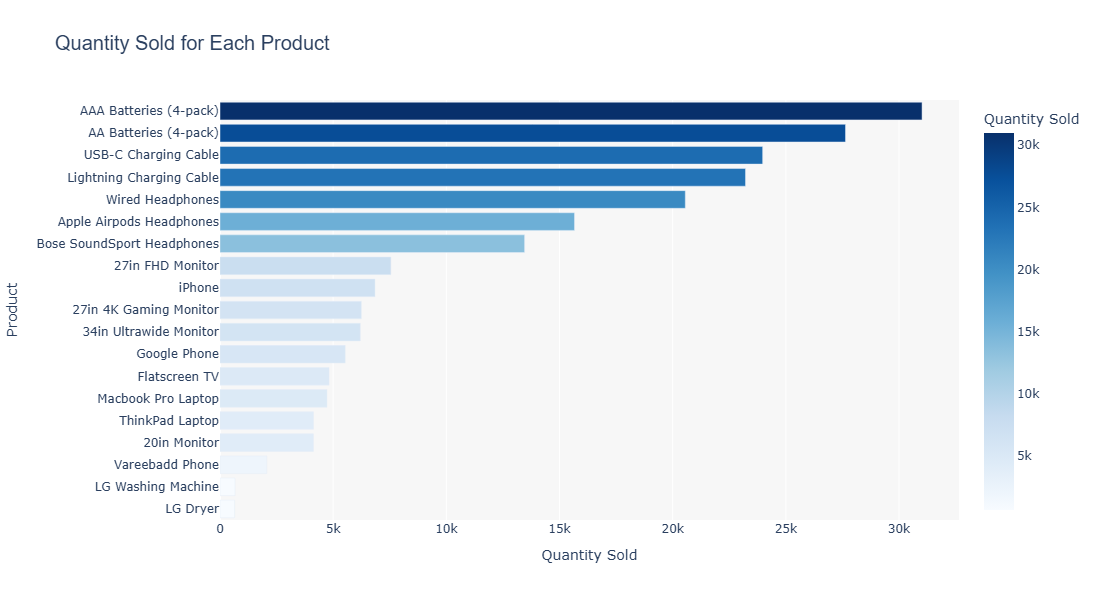

In [100]:
best_product = maindf.groupby('Product')
quantity_sold = best_product['Quantity Ordered'].sum()
product_data = quantity_sold.reset_index()
product_data = product_data.sort_values('Quantity Ordered', ascending=True).rename(columns={'Quantity Ordered': 'Quantity Sold'})


fig = px.bar(product_data, 
             x='Quantity Sold', 
             y='Product', 
             orientation='h', 
             title='Quantity Sold for Each Product',
             color='Quantity Sold', 
             color_continuous_scale='blues',
             labels={'Quantity Sold': 'Quantity Sold', 'Product': 'Product'})


fig.update_layout(
    title_font_size=20,
    title_font_family="Arial",
    xaxis_title="Quantity Sold",
    yaxis_title="Product",
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    plot_bgcolor="rgba(245, 245, 245, 0.8)",
    bargap=0.2,
    height=600,
)

fig.show()

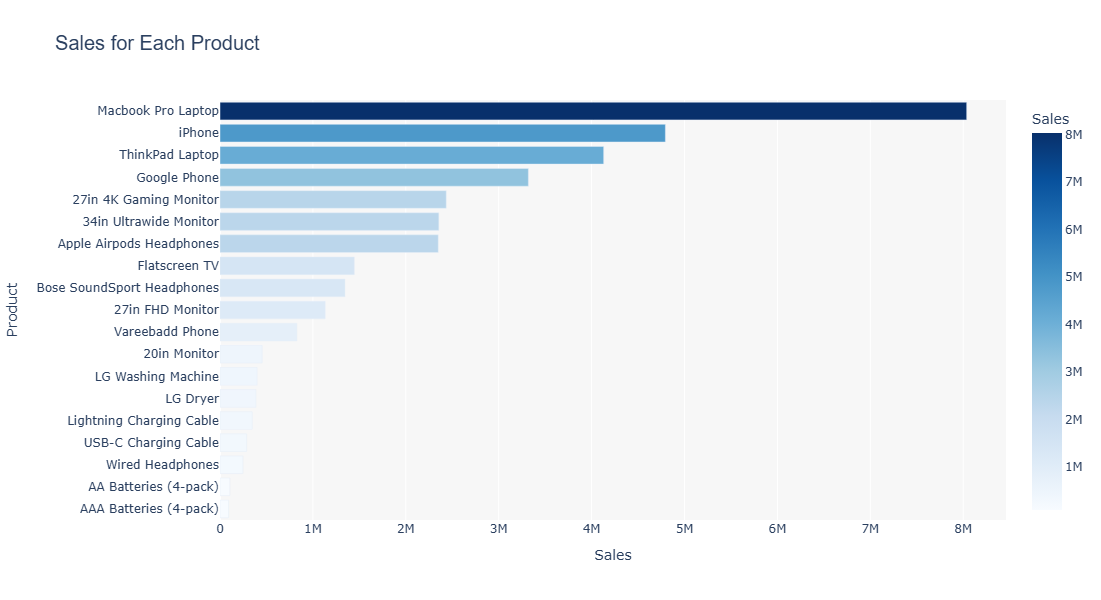

In [99]:
best_product = maindf.groupby('Product')
sales = best_product['Sales'].sum()
product_data = sales.reset_index()
product_data = product_data.sort_values('Sales', ascending=True)


fig = px.bar(product_data, 
             x='Sales', 
             y='Product', 
             orientation='h', 
             title='Sales for Each Product',
             color='Sales', 
             color_continuous_scale='blues',
             labels={'Sales': 'Sales', 'Product': 'Product'})


fig.update_layout(
    title_font_size=20,
    title_font_family="Arial",
    xaxis_title="Sales",
    yaxis_title="Product",
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    plot_bgcolor="rgba(245, 245, 245, 0.8)",
    bargap=0.2,
    height=600,
)

fig.show()

### 2. What time of the day we have most orders

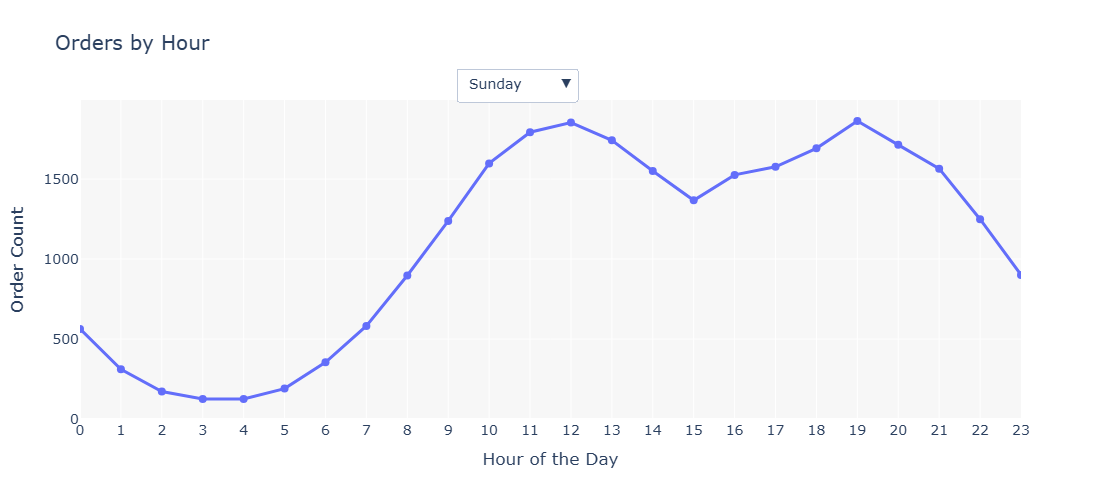

In [101]:
hourly_orders = maindf.groupby(['Weekday', 'Hour']).size().reset_index(name='Order Count')

fig = go.Figure()


days = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

for day in range(0, 7):
    day_data = hourly_orders[hourly_orders['Weekday'] == day]
    fig.add_trace(go.Scatter(
        x=day_data['Hour'],
        y=day_data['Order Count'],
        mode='lines+markers',
        line=dict(width=3),
        marker=dict(size=8),
        name=days[day],
        visible=(day == 0)  
    ))


buttons = []
for day in days:
    button = dict(
        method="update",
        label=days[day],
        args=[{"visible": [i == day for i in range(7)]},
              {"title": f"Orders by Hour for {days[day]}"}]
    )
    buttons.append(button)


fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.4,
        xanchor="left",
        y=1.1,
        yanchor="top",
        direction="down",
    )],
    title="Orders by Hour",
    xaxis=dict(title="Hour of the Day", tickmode='linear', dtick=1, range=[0, 23]),
    yaxis=dict(title="Order Count"),
    plot_bgcolor='rgba(245, 245, 245, 0.8)',
    font=dict(size=14),
    hovermode="x",
    height = 500
)


fig.show()

### 3. Best month for sales

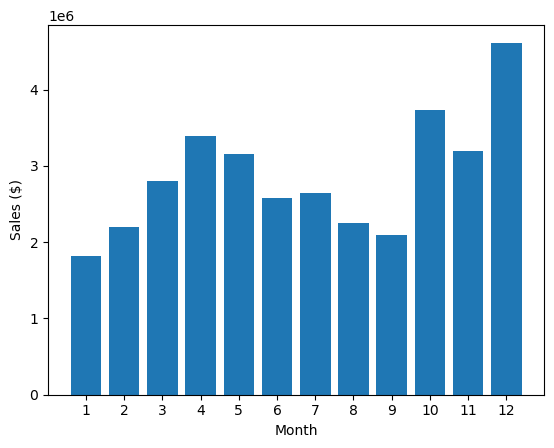

In [108]:
best_month = maindf.groupby('Month')
months = range(1,13)
plt.bar(months,best_month['Sales'].sum())
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

### 4. What city has the most revenue?

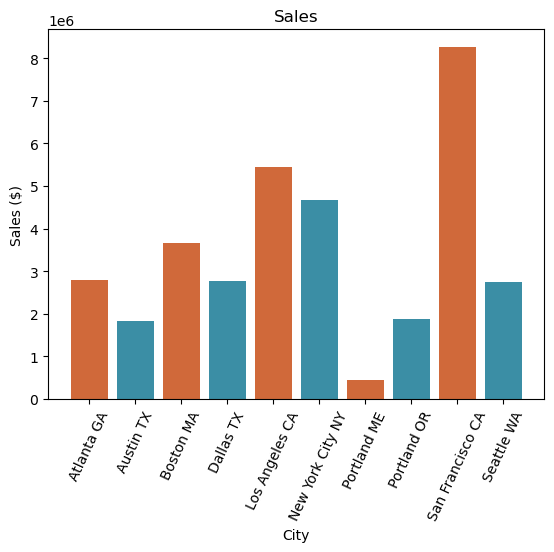

In [94]:
best_city = maindf.groupby('City State')
city = [city for city, maindf in best_city]
city_sales = best_city['Sales'].sum()

plt.bar(city, city_sales,color=['#D0693A','#3B8EA5'])
plt.xticks(city, rotation = 65)
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.title('Sales')
plt.show()

### 5. Sales Trend

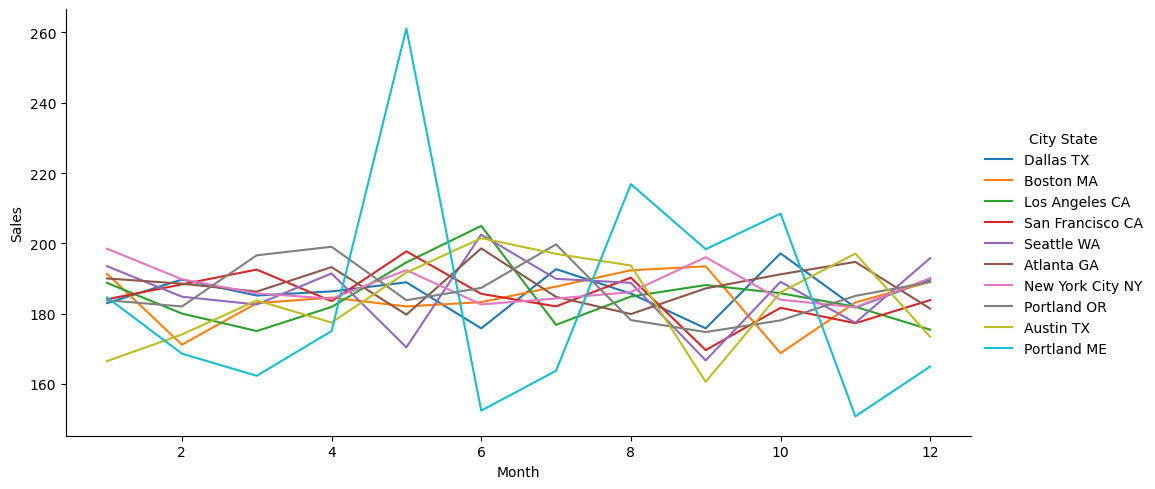

In [95]:
sns.relplot(
    data=maindf, 
    x="Month", y="Sales", hue="City State", 
    height=5, aspect=2,
    kind="line",
    errorbar=None
)

In [96]:
barrace = maindf.pivot_table(index=['Date'],columns=['City State'], values='Sales',aggfunc="sum",fill_value=0)
barrace

City State,Atlanta GA,Austin TX,Boston MA,Dallas TX,Los Angeles CA,New York City NY,Portland ME,Portland OR,San Francisco CA,Seattle WA
Date,,,,,,,,,,
2019-01-01,5073.02,1645.32,9398.93,5887.39,13255.58,5849.63,261.94,2709.38,14160.78,7439.97
2019-01-02,6090.95,2424.62,6359.15,7807.01,10016.08,8961.80,261.98,4097.80,19760.67,5033.14
2019-01-03,2281.95,3120.38,6062.08,3152.81,10105.24,4012.95,212.32,1697.71,11714.46,4686.30
2019-01-04,6747.21,1163.73,5951.04,7331.46,11958.43,6830.51,203.36,2371.53,17256.76,2198.18
2019-01-05,3143.15,590.62,10407.27,2960.99,8087.97,4320.47,775.81,1951.12,10990.10,3297.13
...,...,...,...,...,...,...,...,...,...,...
2019-12-28,5613.75,8165.42,14451.85,11612.18,19339.45,14436.17,3317.89,5452.13,37837.68,13788.98
2019-12-29,12976.66,7763.91,16853.54,12658.86,21866.41,24414.17,1138.77,6459.07,36956.36,14936.87
2019-12-30,12700.45,7310.50,17855.01,15347.72,21045.66,19869.59,2301.86,7004.35,38449.91,10434.76


In [98]:
total_sales = maindf['Sales'].sum()
total_sales

34492035.97

In [102]:
maindf

,Order ID,Product,Quantity Ordered,Price Each,Order DateTime,Purchase Address,Date,Month,Weekday,MonthDay,Hour,Minute,Sales,City State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,4,4,19,8,46,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,4,6,7,22,30,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,12,14,38,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,12,14,38,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,4,1,30,9,27,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019-09-17,9,1,17,20,56,8.97,Los Angeles CA
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,9,6,1,16,0,700.00,San Francisco CA
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019-09-23,9,0,23,7,39,700.00,San Francisco CA
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019-09-19,9,3,19,17,30,379.99,San Francisco CA
